In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'lung-cancer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2206522%2F3947767%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240510%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240510T120007Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9faffff73ce27dfc23f072c46e8dd3f8d599f7723ae0e7e57a5b169dad883877635012180228675991b483da1793dc80cc005577d13d6f38c27acd34478913854e75590873439b8d7a7327971ef722425cd01bfdb9ff9273bc459f6c83225d8c8701601c0e873b0dc9aca8b4101f67969a3138f51fd76b9aa742060d541e3a3acd47f4e1e057557867524efbfd437a5cf6332b0fc6978c4322ce3cd8e1cea61501f122977e2816ea740dc4367718e5bdb4e877d3fb6a1d821ac97e85d1635188b1ccab9f0bc59a0059f404853ee1ff046f70c4e72cdd2cce5ae8d73e469a744bc92bebed46a3d8fa8585a62962d946bb624c1629b169b191b785f459f2dcabd7'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


# Introduction

**This is an exploratory data analysis (EDA) notebook on a lung cancer dataset that contains different features/attributes that could help find insights to why some people are diagnosed with lung cancer, what may have led to getting the cancer, symptoms, trends across ages, gender, etc.**

# Importing Libraries and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cancer_data = pd.read_csv("lung_cancer.csv")
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
cancer_data.shape

(309, 16)

**The dataset contains 309 rows and 16 columns.**

# Data Cleaning

In [5]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**Looking at the dataset and datatypes, we can see that only two of the columns are object types (categorical variables), rest are all integer types containing values 1 and 2, where 1 = No and 2 = Yes.**

In [6]:
cancer_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**Fortunately, there are no missing values in this dataset.**

In [7]:
# First, we will change the data types of the categorical variables
cancer_data['LUNG_CANCER'] = cancer_data['LUNG_CANCER'].factorize(['NO','YES'])[0]
cancer_data['GENDER'] = cancer_data['GENDER'].factorize(['NO','YES'])[0]

In [8]:
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


**Male = 1 Female = 0**              
**Yes = 1 No = 0**

# Exploratory Data Analysis

<Axes: >

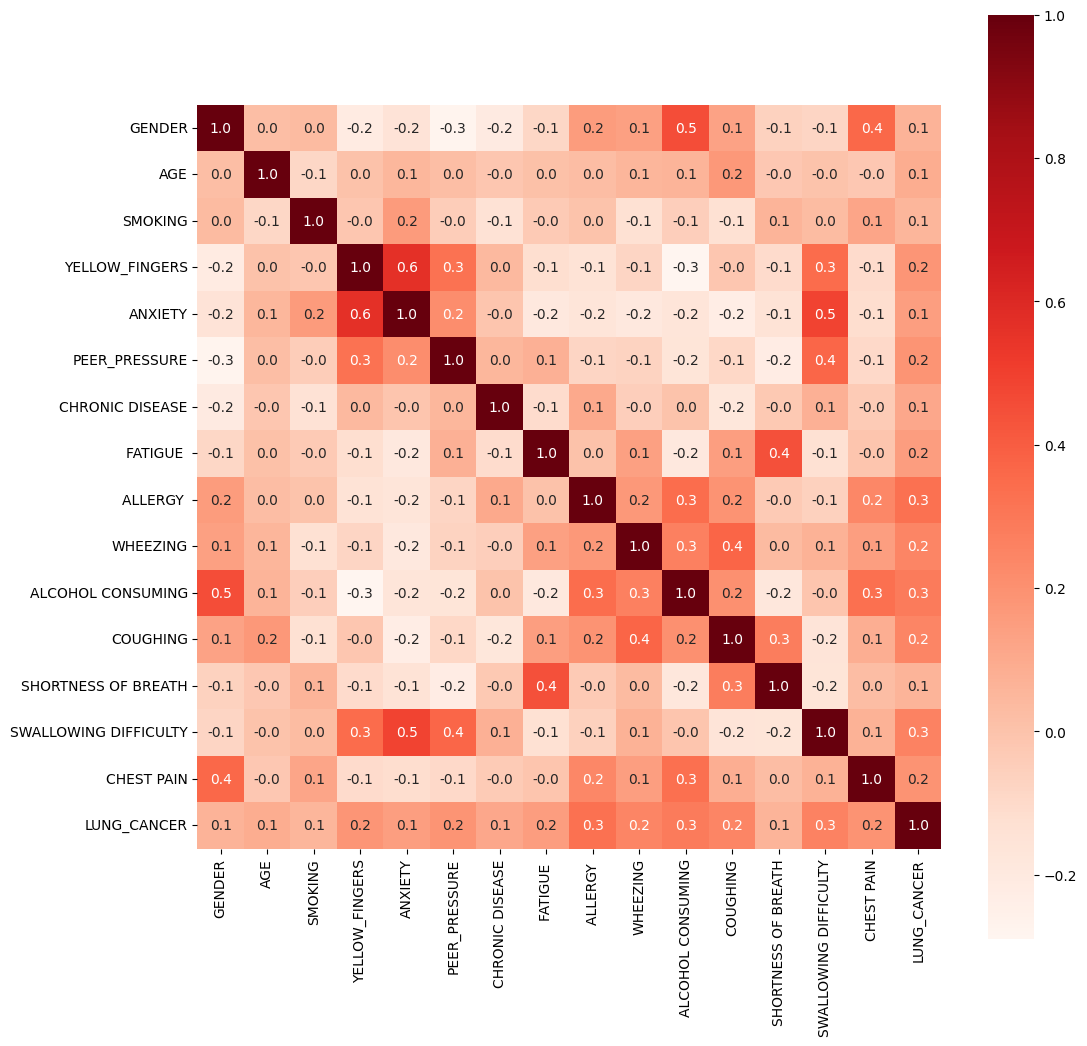

In [9]:
# We can use a heatmap to check correlation between the variables.

corr = cancer_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

**There aren't a lot of strong correlations among the different features except maybe some minor ones such as:**

* More anxiety leads to more difficulty in breathing
* More anxiety causes yellow fingers or it could be vice versa as any kind of changes in body may lead to increased anxiety
* Shortness of breath causes fatigue
* Increased anxiety makes it more difficult to swallow

**However, there isn't a lot of correlation between the symptoms and the target variable and this could be because of the type of data or surveyors.**

In [10]:
# Now we will rename the 1s and 2s to No and Yes so it is easier to understand
cancer_data["GENDER"] = cancer_data["GENDER"].replace({1:"Male", 0:"Female"})
cancer_data["LUNG_CANCER"] = cancer_data["LUNG_CANCER"].replace({1:"Yes", 0:"No"})
for column in cancer_data.columns:
    cancer_data[column] = cancer_data[column].replace({1: "No", 2: "Yes"})

cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,No
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No


<Axes: xlabel='SMOKING', ylabel='count'>

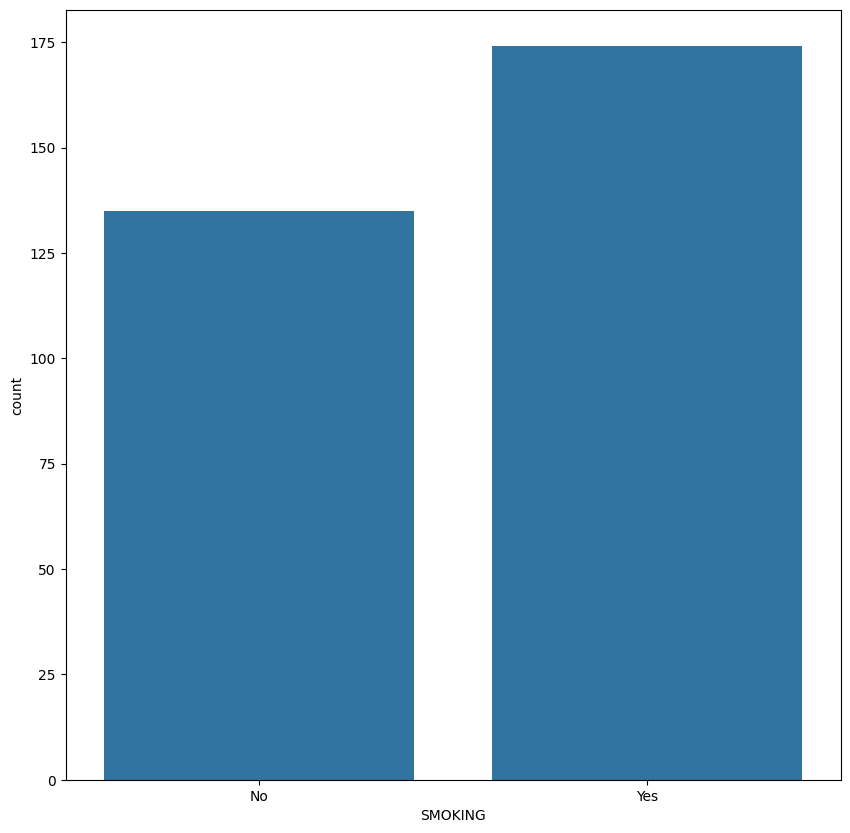

In [11]:
# Smokers count
plt.figure(figsize=(10,10))
sns.countplot(x="SMOKING", data=cancer_data)

**More smokers in the dataset compared to non smokers.**

<Axes: ylabel='count'>

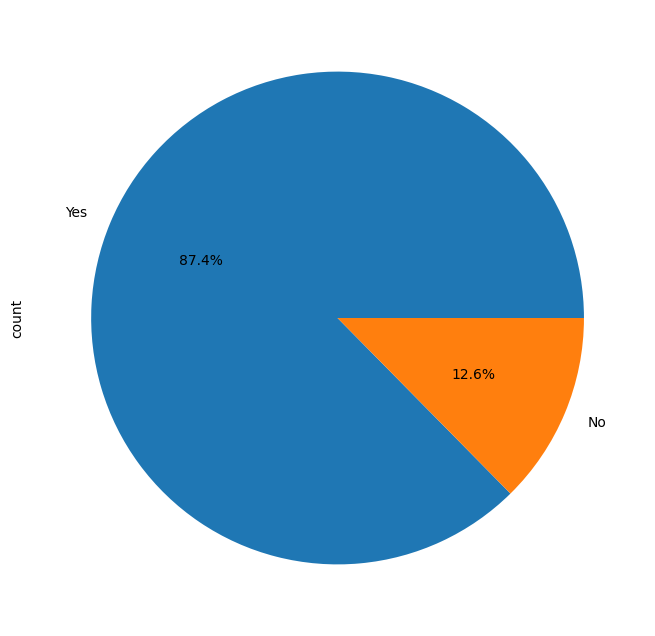

In [12]:
# Percentage of people with lung cancer in the dataset

# 100. * cancer_data.LUNG_CANCER.value_counts() / len(cancer_data.LUNG_CANCER)
cancer_data.LUNG_CANCER.value_counts().plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%')

In [13]:
100. * cancer_data.LUNG_CANCER.value_counts() / len(cancer_data.LUNG_CANCER)

LUNG_CANCER
Yes    87.378641
No     12.621359
Name: count, dtype: float64

**More than 87% of the surveyors were diagnosed with lung cancer. Only the other ~ 13% were not.**

<Axes: xlabel='AGE', ylabel='Count'>

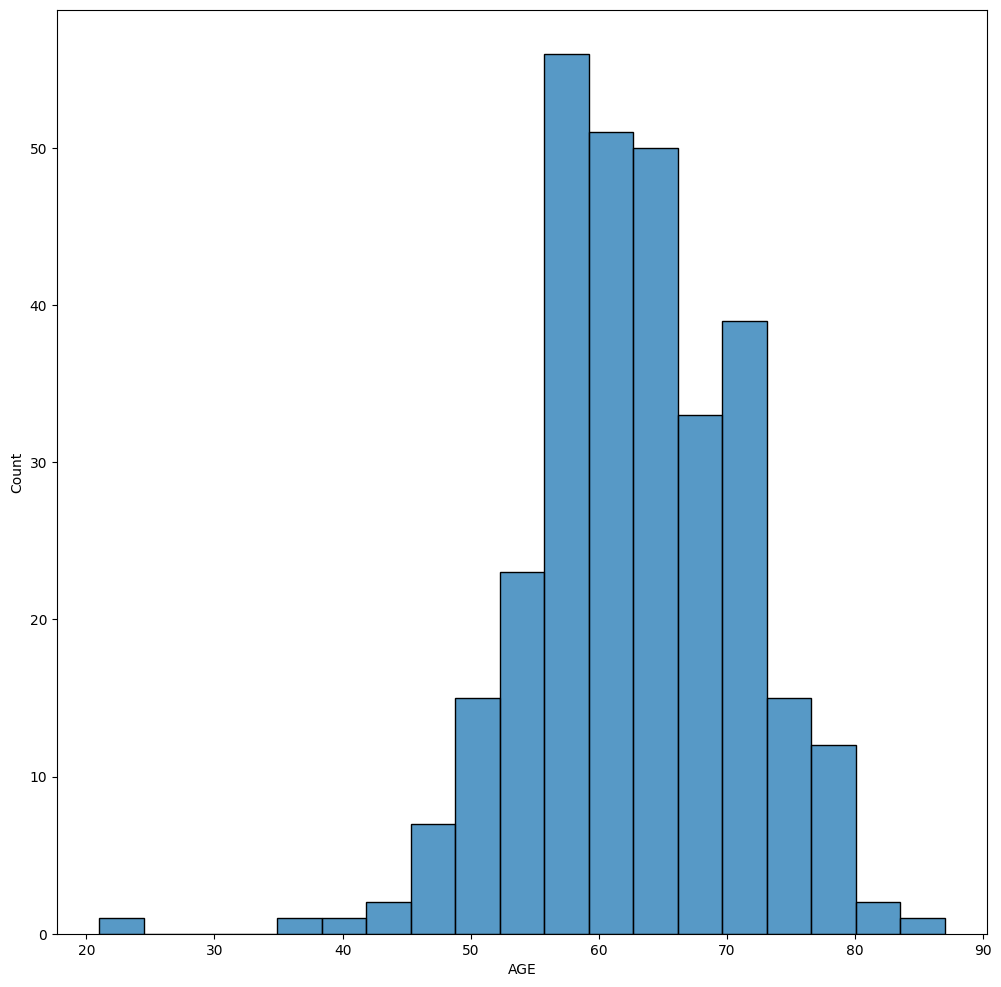

In [14]:
plt.figure(figsize = (12,12))
sns.histplot(cancer_data['AGE'])

**Most of the surveyors were in the age category of 50-70.**

In [15]:
cancer_data.GENDER.value_counts()

GENDER
Male      162
Female    147
Name: count, dtype: int64

<Axes: xlabel='GENDER', ylabel='count'>

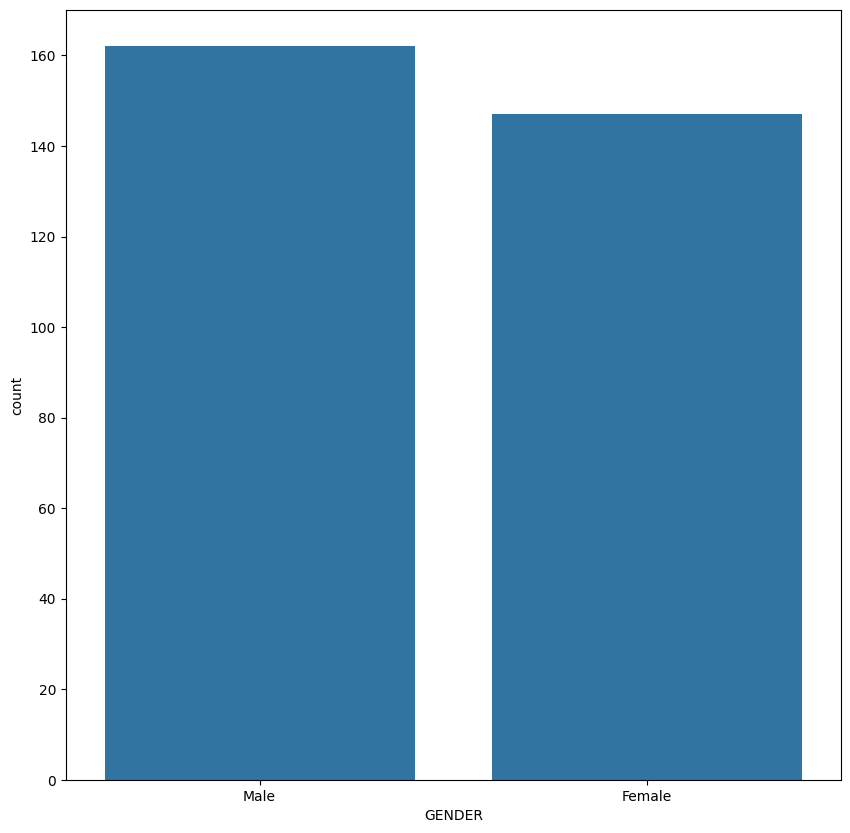

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x="GENDER", data=cancer_data)

**Most of the surveyors were male but the difference between number of males and females is not too much.**

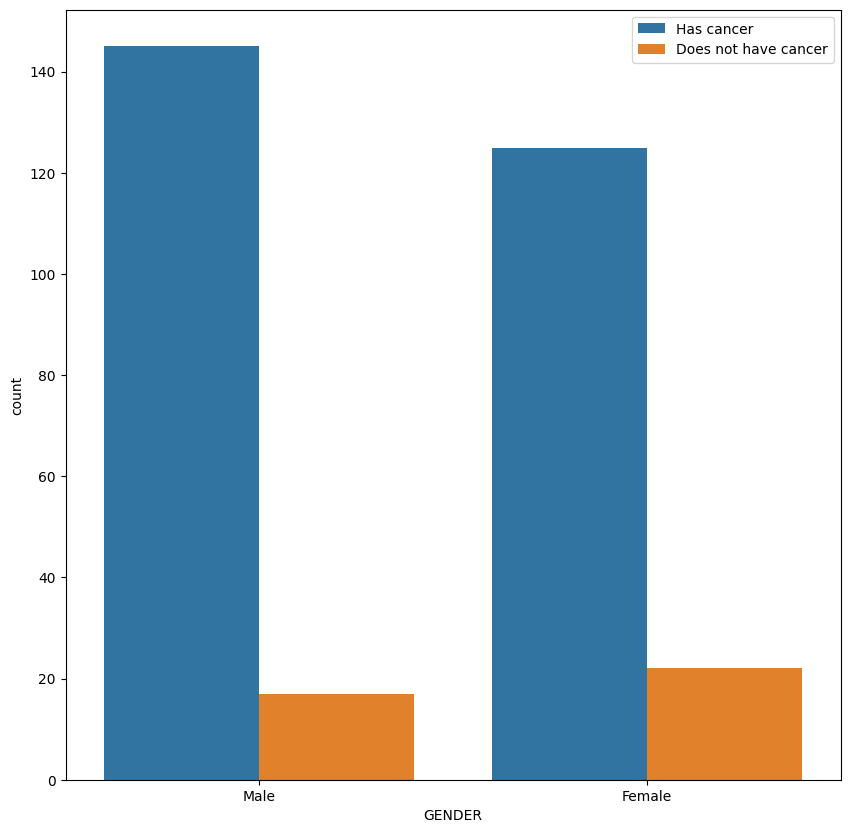

In [17]:
# Lung Cancer across Genders
plt.figure(figsize=(10,10))
sns.countplot(data=cancer_data,x='GENDER',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

**For both males and females, majority of the surveyors had cancer.**

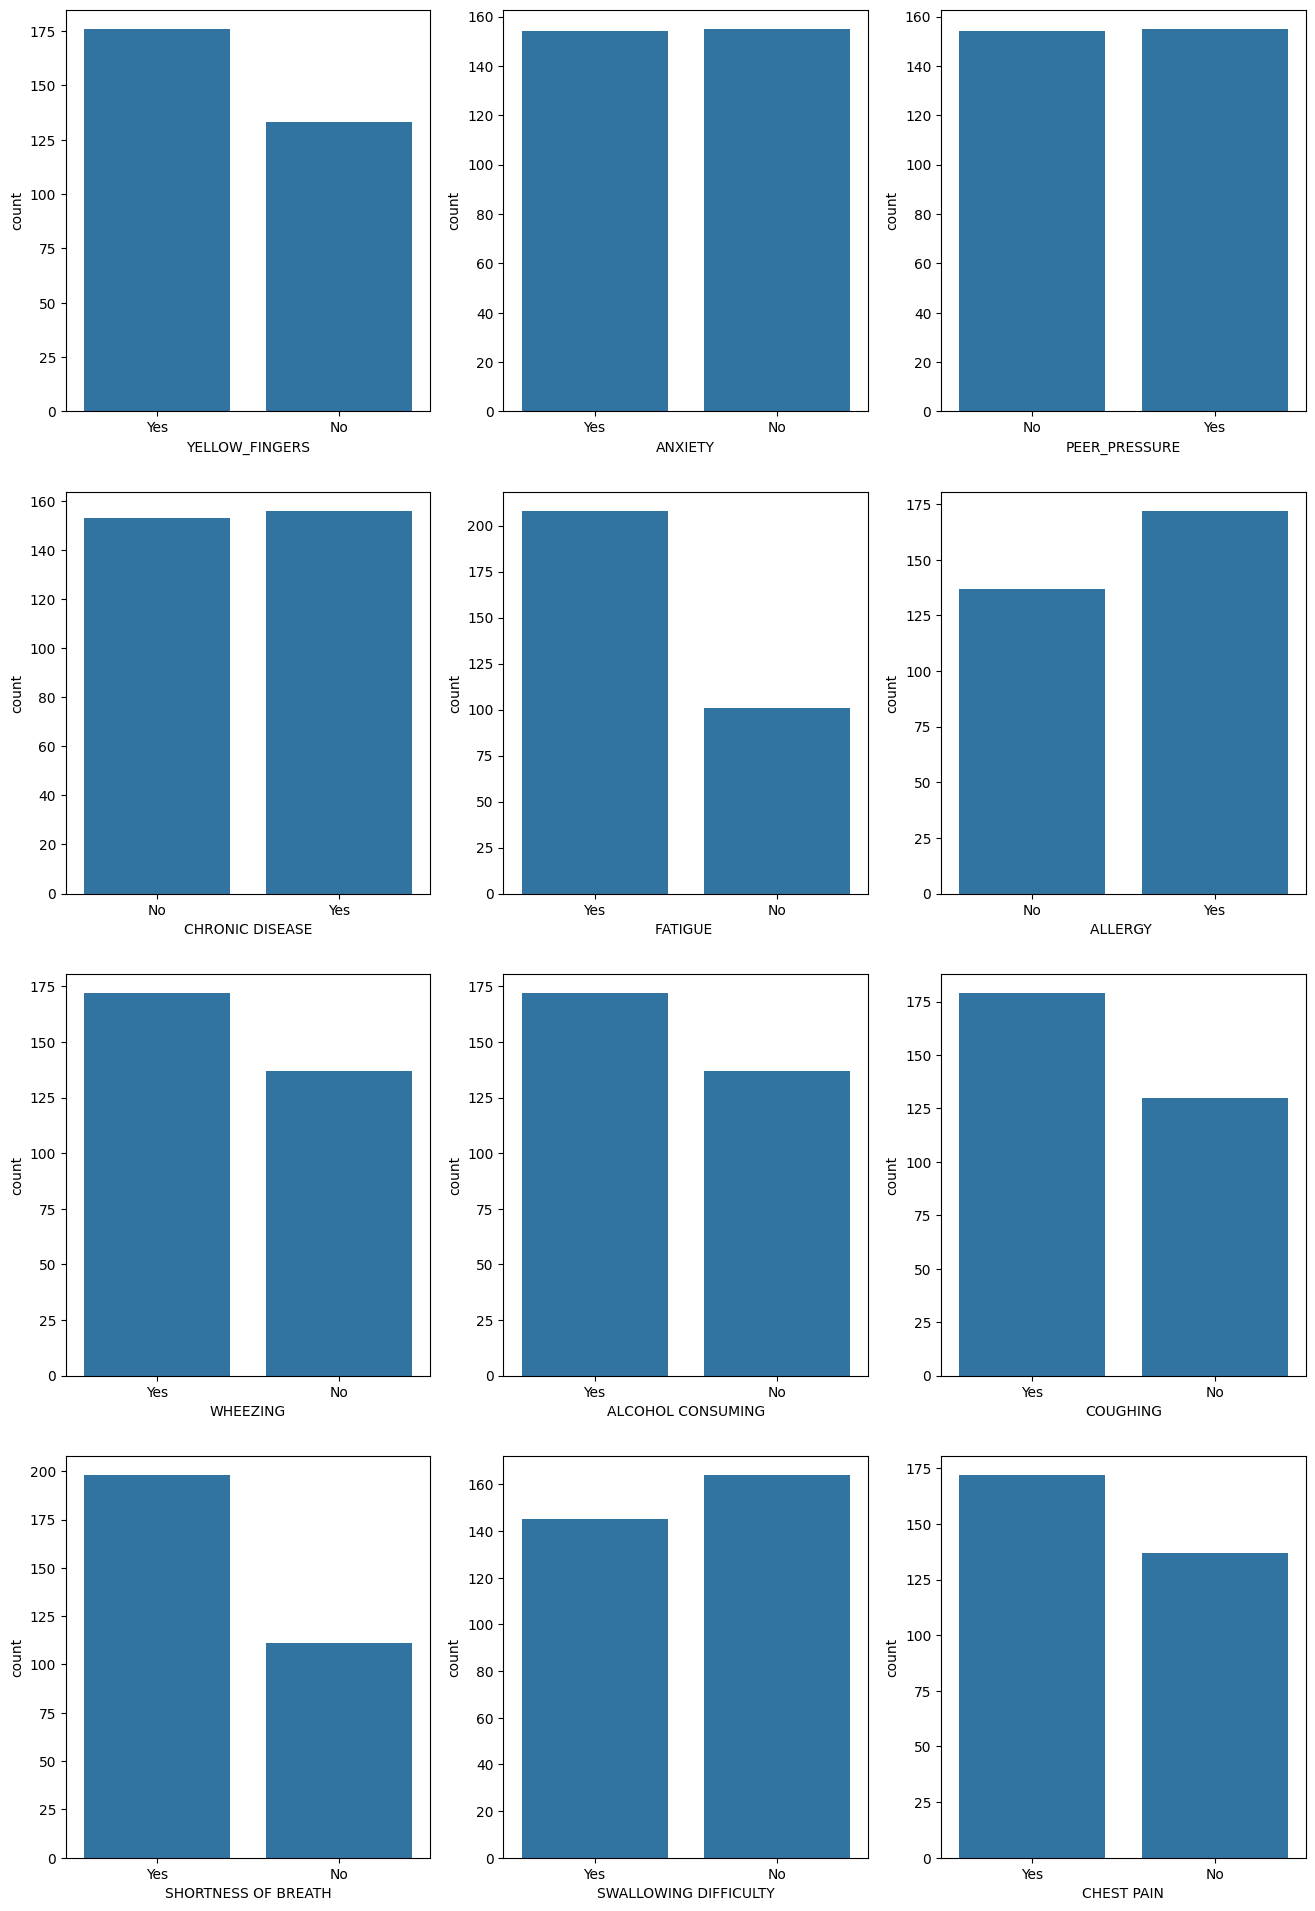

In [18]:
X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig, ax = plt.subplots(nrows = 4, ncols = 3) # 16 subplots
fig.set_size_inches(16,24) # set figure size

for i in range(4):
    for j in range(3):
        sns.countplot(x = cancer_data[X[3 * i + j]] , ax = ax[i][j]) # count plot

**After plotting multiple countplots for the different features, we can see that most surveyors said yes to having symptoms such as yellow fingers, coughing, fatigue, shortness of breath and chest pain meaning these are the primary/more crucial symptoms that people should look out for as they may be at risk of having cancer.**

**Let's analyze the likeliness of having the symptoms a little more.**

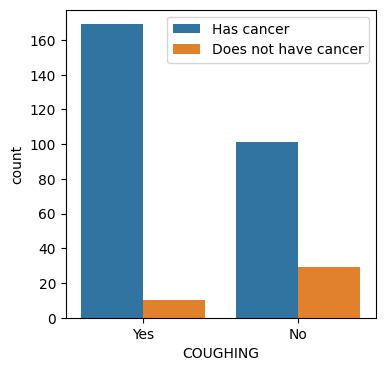

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(data=cancer_data,x='COUGHING',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

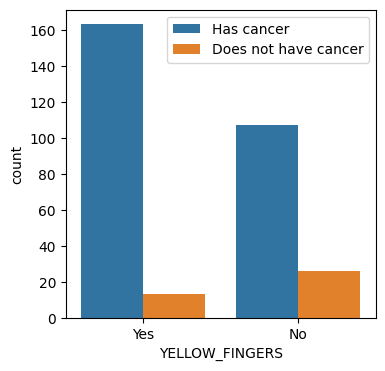

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(data=cancer_data,x='YELLOW_FINGERS',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

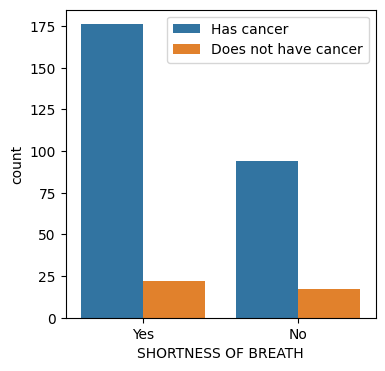

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(data=cancer_data,x='SHORTNESS OF BREATH',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

**Interestingly, in all three of the plots we can see that it doesn't really matter if the symptoms are showing or not as some people may have cancer yet not show any symptoms. So, regular checkups would be wiser than waiting for symptoms to show up as that may lead it to deteriorate conditions.**

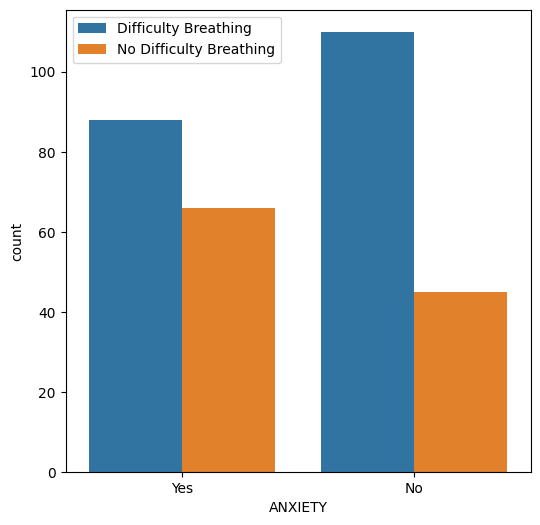

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(data=cancer_data,x='ANXIETY',hue='SHORTNESS OF BREATH')
plt.legend(["Difficulty Breathing", 'No Difficulty Breathing'])

**Earlier, I inferred that more anxiety may lead to more difficulty in breathing but we can see from this visualization that it does not really matter if someone has anxiety or not, most surveyors have difficulty breathing and this may be directly correlated to having cancer.**

# Conclusion

**Based on the data, we've made inferences such as relationships between symptoms and the likeliness of having lung cancer and relationships with gender, age, etc.**

**Training a machine learning model with this dataset could help us predict whether or not someone will be diagnosed with lung cancer or not.**